# CIFAR10 Dataset EDA

### Load Library

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from collections import Counter

### Load CIFAR10 DATA

In [27]:
# Function to load CIFAR-10 batch files
def load_cifar10_batch(file):
    with open(file, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        # Decode byte strings for Python 3 compatibility
        batch_decoded = {k.decode('utf-8'): v for k, v in batch.items()}
    return batch_decoded

# Load data_batch_1
batch_1 = load_cifar10_batch('./data/cifar-10-batches-py/data_batch_1')

# Extract image data and labels
images = batch_1['data']
labels = batch_1['labels']

print(str(len(images)) + ' images and corresponding label in the first batch')

# CIFAR-10 images are stored as 1D arrays of size 3072 (32x32x3)
# Reshape to (num_images, height, width, channels)
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

10000 images and corresponding label in the first batch


The dataset still have the other 4 training batches with name `data_batch_n` and one test batch with name `test_batch`, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class.

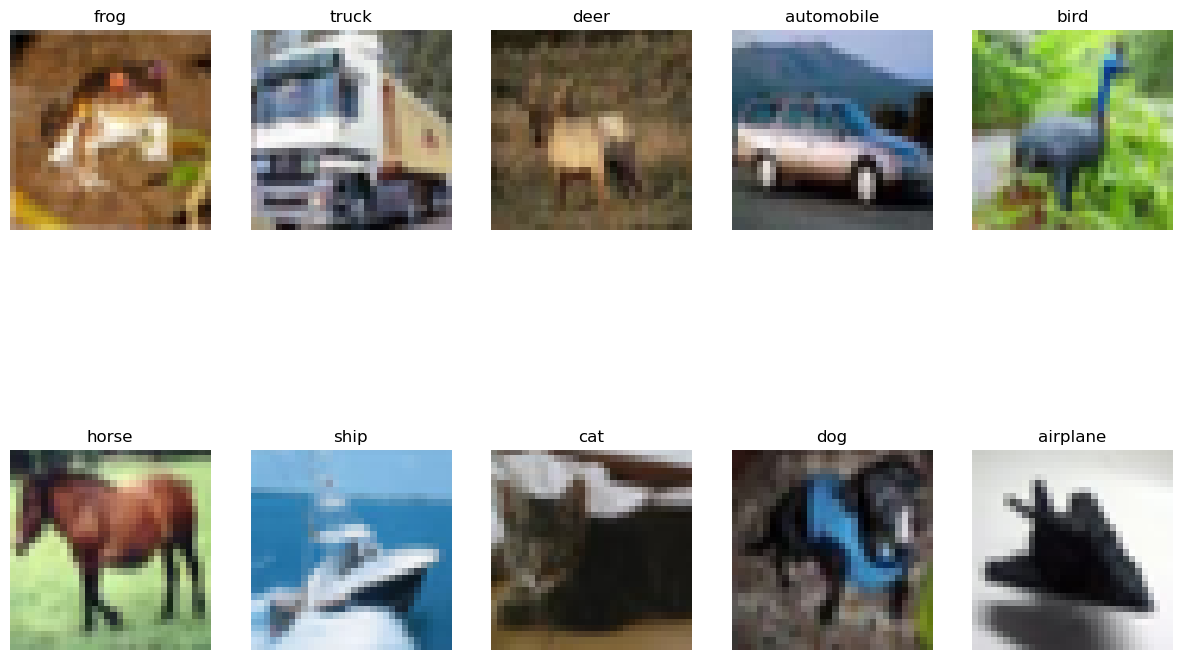

In [21]:
# Function to display one image for each category
def show_images_by_category(images, labels, class_names):
    plt.figure(figsize=(15, 10))
    images_shown = set()
    
    for i in range(len(images)):
        label = labels[i]
        if label not in images_shown:
            plt.subplot(2, 5, len(images_shown) + 1)
            plt.imshow(images[i])
            plt.title(f'{class_names[label]}')
            plt.axis('off')
            images_shown.add(label)
        
        if len(images_shown) == len(class_names):
            break
    
    plt.show()

# Show one image per category
show_images_by_category(images, labels, class_names)

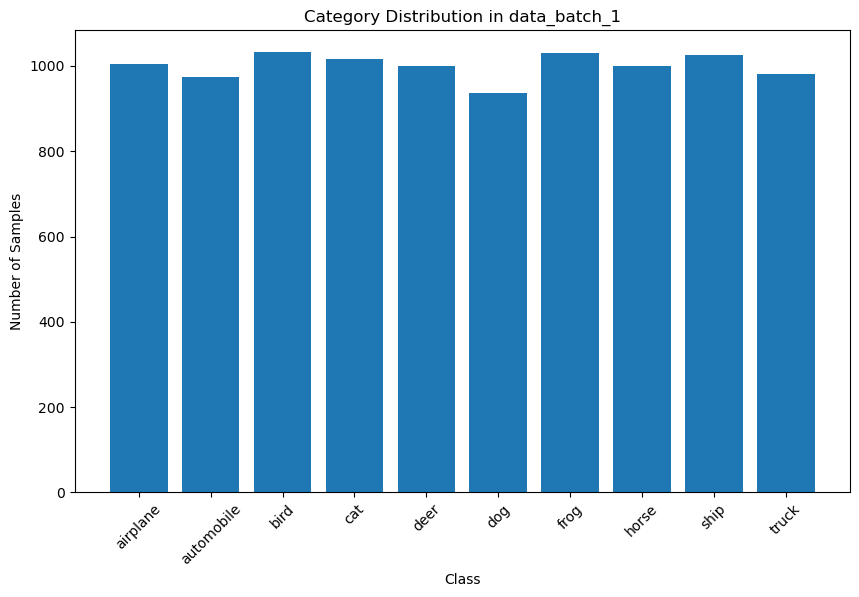

In [28]:
# Function to plot category distribution
def plot_label_distribution(labels, class_names):
    label_counts = Counter(labels)
    
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, [label_counts[i] for i in range(len(class_names))])
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title('Category Distribution in data_batch_1')
    plt.xticks(rotation=45)
    plt.show()

# Plot the label distribution
plot_label_distribution(labels, class_names)

The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another as shown above. Between them, the training batches are considered balanced because contain exactly 5000 images from each class.